In [6]:
import pandas as pd
import geopandas as gpd
from dbfread import DBF

In [8]:
# Import shapefile
shp = gpd.read_file( r"..\_data\Boundaries - Community Areas (current)\geo_export_c70de887-6264-4a56-8002-525083272f7a.shp" )

In [9]:
# Impor data
db_in_dbf = DBF( r"..\_data\airbnb_Chicago 2015.dbf" )
df = pd.DataFrame(db_in_dbf )

In [11]:
# Per thousand
df['num_theft_mil'] = df.num_theft * 1000 / df.population
df['num_crim_mil'] = df.num_crimes * 1000 / df.population
df['num_spot_mil'] = df.num_spots * 1000 / df.population

In [14]:
shp1 = shp.merge( df, on = 'community', how = "left")

In [15]:
shp1.to_file( r"..\_data\chicago_result/chicago_result.shp" )

c:\python\python38\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
<ipython-input-15-c10ae54b8146>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp1.to_file( r"..\_data\chicago_result/chicago_result.shp" )


In [19]:
import seaborn as sns

In [27]:
shp1.columns

Index(['area', 'area_num_1', 'area_numbe', 'comarea', 'comarea_id',
       'community', 'perimeter', 'shape_area_x', 'shape_len_x', 'geometry',
       'shape_area_y', 'shape_len_y', 'AREAID', 'response_r', 'accept_r',
       'rev_rating', 'price_pp', 'room_type', 'num_spots', 'poverty',
       'crowded', 'dependency', 'without_hs', 'unemployed', 'income_pc',
       'harship_in', 'num_crimes', 'num_theft', 'population', 'num_theft_mil',
       'num_crim_mil', 'num_spot_mil'],
      dtype='object')

<AxesSubplot:xlabel='without_hs', ylabel='price_pp'>

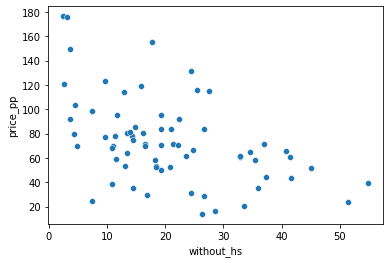

In [30]:
sns.scatterplot(data=shp1 , y="price_pp", x="without_hs")

In [17]:
shp1.unemployed

0     18.2
1     28.7
2     33.9
3     24.3
4     15.7
      ... 
72     8.7
73    15.0
74     7.1
75     9.2
76     6.5
Name: unemployed, Length: 77, dtype: float64